[1] " To which probability distribution do home and away goals fitting well? Does the distribution look like Poisson distribution?"
[1] "Poisson, yes"
[1] "Is this consistent with Poisson distribution claim?"
[1] "Mostly, yes"


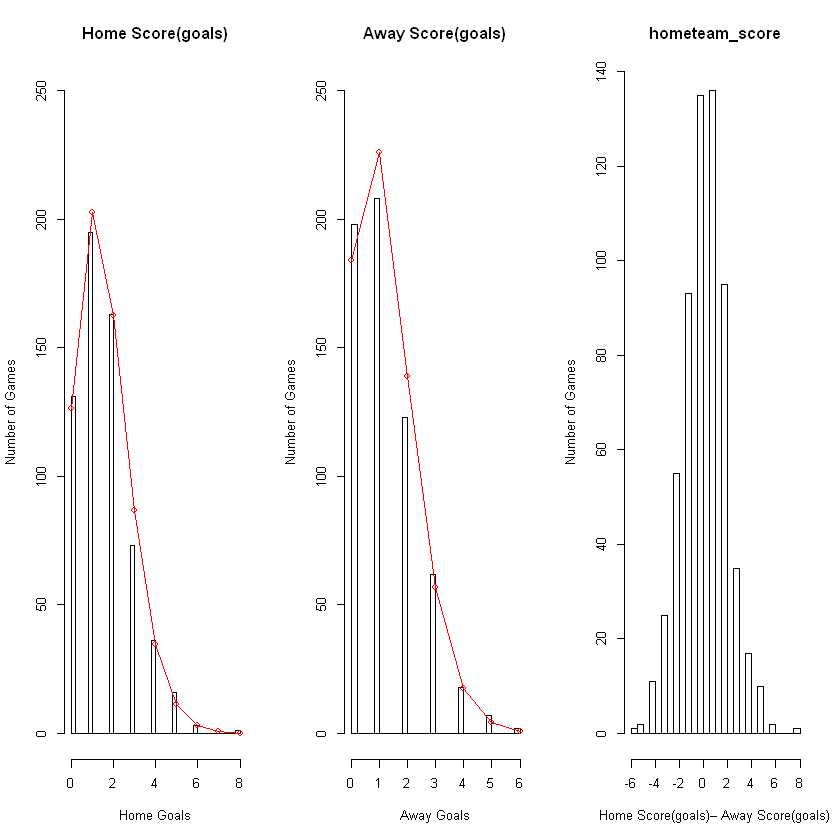

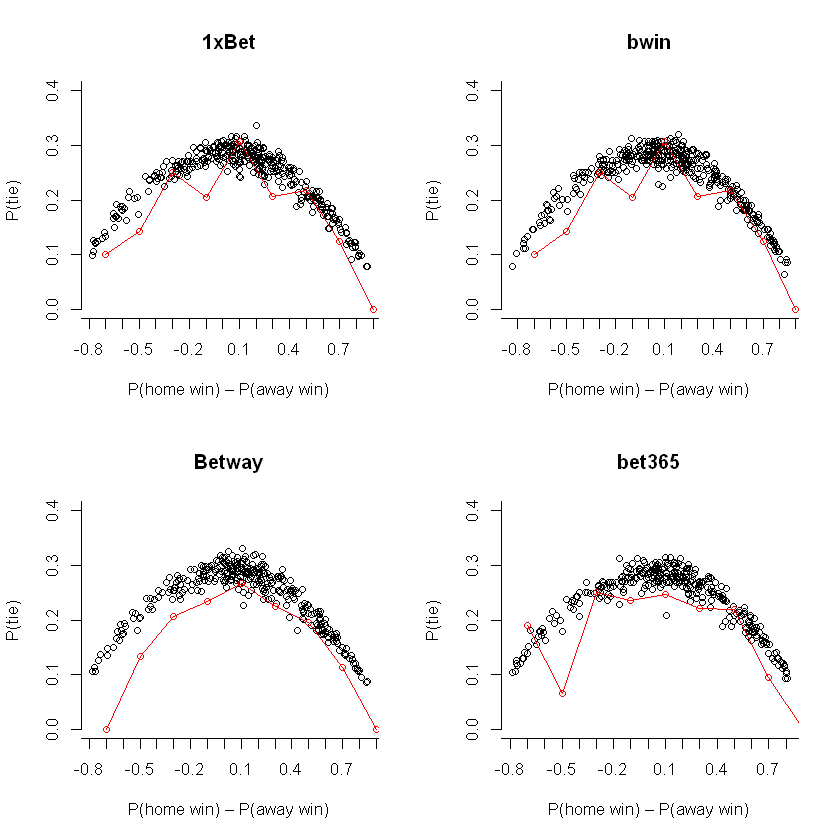

removed match counts for each bookmaker:  31[1] "in Task 3, matches that involve red card decision are ignored because it can strongly affect the result even if there is less than 10 minutues to end"
[1] "as a result, estimated probability of draws is increased for the bookmaker 1xBet and bwin significantly. The most significant increase is for bwin between -0.4 and -0.2"
[1] "Results also slightly better for Betway and bet365 "


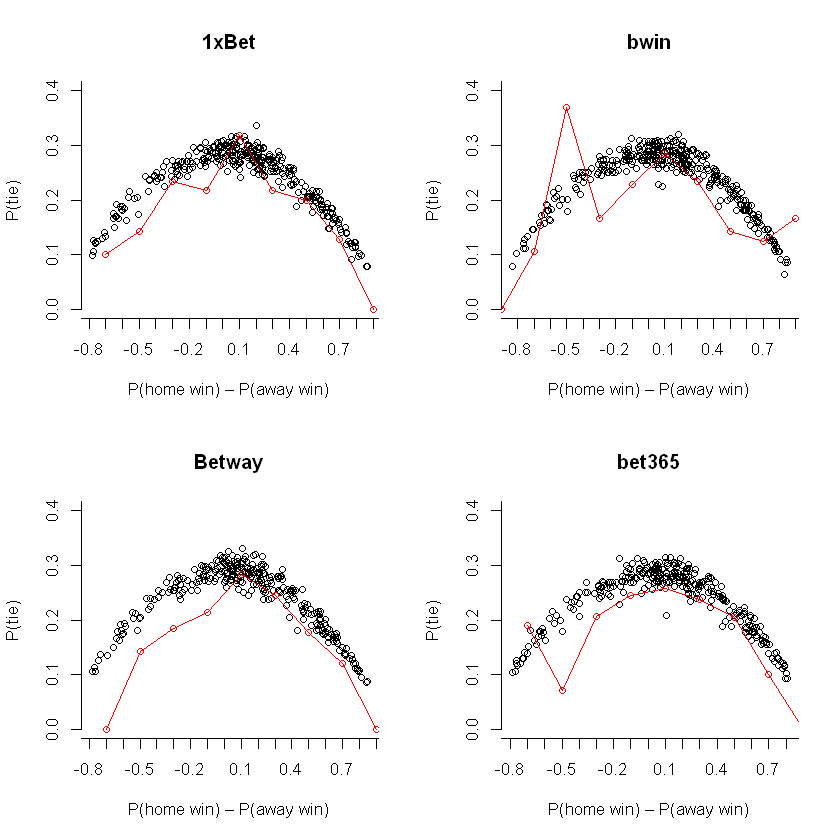

In [5]:
rm(list=ls()) 

bets <- read.csv(file="c:/Users/Onur/Desktop/bets.csv", header=TRUE, sep=",")
stats <- read.csv(file="c:/Users/Onur/Desktop/stats.csv", header=TRUE, sep=",")
booking <- read.csv(file="c:/Users/Onur/Desktop/booking.csv", header=TRUE, sep=",")
matches <- read.csv(file="c:/Users/Onur/Desktop/matches.csv", header=TRUE, sep=",")

premier_league_matches = matches[matches$league_id == 148, ]
finished_premier_league_matches = premier_league_matches[premier_league_matches$match_status == "Finished",]

print(" To which probability distribution do home and away goals fitting well? Does the distribution look like Poisson distribution?" )
print("Poisson, yes")

par(mfrow=c(1,3))
hist(finished_premier_league_matches$match_hometeam_score,breaks = 30 , main = "Home Score(goals)",xlab = "Home Goals",ylab = "Number of Games",ylim=c(0,250))
lambda_hometeam_score = mean(na.omit(finished_premier_league_matches[,c("match_hometeam_score")]))
lines(x= 0:8 ,length(finished_premier_league_matches[,c("match_hometeam_score")]) * dpois( x = 0:8, lambda= lambda_hometeam_score),type="o",col = "red")
hist(finished_premier_league_matches$match_awayteam_score,breaks = 30 , main = "Away Score(goals)",xlab = "Away Goals",ylab = "Number of Games",ylim=c(0,250))
lambda_awayteam_score = mean(na.omit(finished_premier_league_matches[,c("match_awayteam_score")]))
lines(x= 0:6 ,length(finished_premier_league_matches[,c("match_awayteam_score")]) * dpois( x = 0:6, lambda= lambda_awayteam_score),type="o",col = "red")
hist(finished_premier_league_matches$match_hometeam_score-finished_premier_league_matches$match_awayteam_score,breaks = 30, main = "hometeam_score",xlab = "Home Score(goals)– Away Score(goals)",ylab = "Number of Games")

print("Is this consistent with Poisson distribution claim?")
print("Mostly, yes")


# Task 2

bets <- read.csv(file="c:/Users/Onur/Desktop/bets.csv", header=TRUE, sep=",")
stats <- read.csv(file="c:/Users/Onur/Desktop/stats.csv", header=TRUE, sep=",")
booking <- read.csv(file="c:/Users/Onur/Desktop/booking.csv", header=TRUE, sep=",")
matches <- read.csv(file="c:/Users/Onur/Desktop/matches.csv", header=TRUE, sep=",")

premier_league_matches = matches[matches$league_id == 148, ]
finished_premier_league_matches = premier_league_matches[premier_league_matches$match_status == "Finished",]
premier_league_match_id = finished_premier_league_matches[,c("match_id")]

ind_bet_premier_league = (is.na(match(bets$match_id,premier_league_match_id)) == FALSE)
premier_league_bets = bets[ind_bet_premier_league,]

# bwin
# 1xBet
# Betway
# bet365

################## 1xBet #########################################

premier_league_bets_1xBet = premier_league_bets[premier_league_bets$odd_bookmakers == "1xBet",]
premier_league_bets_1xBet_1 = premier_league_bets_1xBet[premier_league_bets_1xBet$variable == "odd_1",]
premier_league_bets_1xBet_x = premier_league_bets_1xBet[premier_league_bets_1xBet$variable == "odd_x",]
premier_league_bets_1xBet_2 = premier_league_bets_1xBet[premier_league_bets_1xBet$variable == "odd_2",]

premier_league_bets_1xBet_1x2 = rbind(premier_league_bets_1xBet_1[,5],premier_league_bets_1xBet_x[,5],premier_league_bets_1xBet_2[,5] )

p_premier_league_bets_1xBet_1x2 = 1/premier_league_bets_1xBet_1x2
colsum_p_premier_league_bets_1xBet_1x2 = colSums(p_premier_league_bets_1xBet_1x2)
pnormal_premier_league_bets_1xBet_1x2 = sweep(p_premier_league_bets_1xBet_1x2, 2, colsum_p_premier_league_bets_1xBet_1x2, FUN = '/')


delta_home_away_win = pnormal_premier_league_bets_1xBet_1x2[1,] - pnormal_premier_league_bets_1xBet_1x2[3,] 

score_difference = matrix(0.1,1,NROW(premier_league_bets_1xBet_x))
results = matrix(0,3,NROW(premier_league_bets_1xBet_x))
for(i in 1:NROW(premier_league_bets_1xBet_x)){
  
  score_difference[i] = matches[matches$match_id == premier_league_bets_1xBet_x[i,1],][1,9]- matches[matches$match_id == premier_league_bets_1xBet_x[i,1],][1,10]
  
  if (score_difference[i] > 0) {
    results[1,i] = 1
  } else if ( score_difference[i] == 0) {
    results[2,i] = 1
  } 
  else{
    results[3,i] = 1
  }
}


bins = matrix(0,10,NROW(premier_league_bets_1xBet_x))
bins_correct_guess = matrix(0,10,NROW(premier_league_bets_1xBet_x))
bin_number = matrix(0,1,NROW(premier_league_bets_1xBet_x))

for(i in 1:NROW(premier_league_bets_1xBet_x)){
  
  bin_number[i] =   ceiling(delta_home_away_win[i] / 0.2)+5
  bins[bin_number[i],i] = 1
  if(results[2,i] == 1){
    bins_correct_guess[bin_number[i],i] = 1
  }
}

real_probability = rowSums(bins_correct_guess)/ rowSums(bins)

################## bwin #########################################

premier_league_bets_bwin = premier_league_bets[premier_league_bets$odd_bookmakers == "bwin",]

premier_league_bets_bwin_1 = premier_league_bets_bwin[premier_league_bets_bwin$variable == "odd_1",]
premier_league_bets_bwin_x = premier_league_bets_bwin[premier_league_bets_bwin$variable == "odd_x",]
premier_league_bets_bwin_2 = premier_league_bets_bwin[premier_league_bets_bwin$variable == "odd_2",]

premier_league_bets_bwin_1x2 = rbind(premier_league_bets_bwin_1[,5],premier_league_bets_bwin_x[,5],premier_league_bets_bwin_2[,5])

p_premier_league_bets_bwin_1x2 = 1/premier_league_bets_bwin_1x2
colsum_p_premier_league_bets_bwin_1x2 = colSums(p_premier_league_bets_bwin_1x2)
pnormal_premier_league_bets_bwin_1x2 = sweep(p_premier_league_bets_bwin_1x2, 2, colsum_p_premier_league_bets_bwin_1x2, FUN = '/')

delta_home_away_win_bwin = pnormal_premier_league_bets_bwin_1x2[1,] - pnormal_premier_league_bets_bwin_1x2[3,] 

score_difference_bwin = matrix(0.1,1,NROW(premier_league_bets_bwin_x))
results_bwin = matrix(0,3,NROW(premier_league_bets_bwin_x))
for(i in 1:NROW(premier_league_bets_bwin_x)){
  
  score_difference_bwin[i] = matches[matches$match_id == premier_league_bets_bwin_x[i,1],][1,9]- matches[matches$match_id == premier_league_bets_bwin_x[i,1],][1,10]
  
  if(is.na(score_difference_bwin[i]) == "TRUE"){
    
  }
  else if (score_difference_bwin[i] > 0) {
    results_bwin[1,i] = 1
  } else if ( score_difference_bwin[i] == 0) {
    results_bwin[2,i] = 1
  } 
  else if(score_difference_bwin[i] < 0){
    results_bwin[3,i] = 1
  }
  
}


bins_bwin = matrix(0,10,NROW(premier_league_bets_bwin_x))
bins_correct_guess_bwin = matrix(0,10,NROW(premier_league_bets_bwin_x))
bin_number = matrix(0,1,NROW(premier_league_bets_bwin_x))

for(i in 1:NROW(premier_league_bets_bwin_x)){
  
  bin_number[i] =   ceiling(delta_home_away_win_bwin[i] / 0.2)+5
  bins_bwin[bin_number[i],i] = 1
  if(results_bwin[2,i] == 1){
    bins_correct_guess_bwin[bin_number[i],i] = 1
  }
}

real_probability_bwin = rowSums(bins_correct_guess_bwin)/ rowSums(bins_bwin)


################## Betway #########################################

premier_league_bets_Betway = premier_league_bets[premier_league_bets$odd_bookmakers == "Betway",]
premier_league_bets_Betway_1 = premier_league_bets_Betway[premier_league_bets_Betway$variable == "odd_1",]
premier_league_bets_Betway_x = premier_league_bets_Betway[premier_league_bets_Betway$variable == "odd_x",]
premier_league_bets_Betway_2 = premier_league_bets_Betway[premier_league_bets_Betway$variable == "odd_2",]

premier_league_bets_Betway_1x2 = rbind(premier_league_bets_Betway_1[,5],premier_league_bets_Betway_x[,5],premier_league_bets_Betway_2[,5])

p_premier_league_bets_Betway_1x2 = 1/premier_league_bets_Betway_1x2
colsum_p_premier_league_bets_Betway_1x2 = colSums(p_premier_league_bets_Betway_1x2)
pnormal_premier_league_bets_Betway_1x2 = sweep(p_premier_league_bets_Betway_1x2, 2, colsum_p_premier_league_bets_Betway_1x2, FUN = '/')

delta_home_away_win_Betway = pnormal_premier_league_bets_Betway_1x2[1,] - pnormal_premier_league_bets_Betway_1x2[3,] 

score_difference_Betway = matrix(0.1,1,NROW(premier_league_bets_Betway_x))
results_Betway = matrix(0,3,NROW(premier_league_bets_Betway_x))
for(i in 1:NROW(premier_league_bets_Betway_x)){
  
  score_difference_Betway[i] = matches[matches$match_id == premier_league_bets_Betway_x[i,1],][1,9]- matches[matches$match_id == premier_league_bets_Betway_x[i,1],][1,10]
  
  if(is.na(score_difference_bwin[i]) == "TRUE"){
    
  }
  else if (score_difference_Betway[i] > 0) {
    results_Betway[1,i] = 1
  } else if ( score_difference_Betway[i] == 0) {
    results_Betway[2,i] = 1
  } 
  else{
    results_Betway[3,i] = 1
  }
}


bins_Betway = matrix(0,10,NROW(premier_league_bets_Betway_x))
bins_correct_guess_Betway = matrix(0,10,NROW(premier_league_bets_Betway_x))
bin_number = matrix(0,1,NROW(premier_league_bets_Betway_x))

for(i in 1:NROW(premier_league_bets_Betway_x)){
  
  bin_number[i] =   ceiling(delta_home_away_win_Betway[i] / 0.2)+5
  bins_Betway[bin_number[i],i] = 1
  if(results_Betway[2,i] == 1){
    bins_correct_guess_Betway[bin_number[i],i] = 1
  }
}

real_probability_Betway = rowSums(bins_correct_guess_Betway)/ rowSums(bins_Betway)


################## bet365 #########################################

premier_league_bets_bet365 = premier_league_bets[premier_league_bets$odd_bookmakers == "bet365",]
premier_league_bets_bet365_1 = premier_league_bets_bet365[premier_league_bets_bet365$variable == "odd_1",]
premier_league_bets_bet365_x = premier_league_bets_bet365[premier_league_bets_bet365$variable == "odd_x",]
premier_league_bets_bet365_2 = premier_league_bets_bet365[premier_league_bets_bet365$variable == "odd_2",]

premier_league_bets_bet365_1x2 = rbind(premier_league_bets_bet365_1[,5],premier_league_bets_bet365_x[,5],premier_league_bets_bet365_2[,5])

p_premier_league_bets_bet365_1x2 = 1/premier_league_bets_bet365_1x2
colsum_p_premier_league_bets_bet365_1x2 = colSums(p_premier_league_bets_bet365_1x2)
pnormal_premier_league_bets_bet365_1x2 = sweep(p_premier_league_bets_bet365_1x2, 2, colsum_p_premier_league_bets_bet365_1x2, FUN = '/')

delta_home_away_win_bet365 = pnormal_premier_league_bets_bet365_1x2[1,] - pnormal_premier_league_bets_bet365_1x2[3,] 


score_difference_bet365 = matrix(0.1,1,NROW(premier_league_bets_bet365_x))
results_bet365 = matrix(0,3,NROW(premier_league_bets_bet365_x))
for(i in 1:NROW(premier_league_bets_bet365_x)){
  
  score_difference_bet365[i] = matches[matches$match_id == premier_league_bets_bet365_x[i,1],][1,9]- matches[matches$match_id == premier_league_bets_bet365_x[i,1],][1,10]
  
  if(is.na(score_difference_bet365[i]) == "TRUE"){
    
  }
  else if (score_difference_bet365[i] > 0) {
    results_bet365[1,i] = 1
  } else if ( score_difference_bet365[i] == 0) {
    results_bet365[2,i] = 1
  } 
  else{
    results_bet365[3,i] = 1
  }
}


bins_bet365 = matrix(0,10,NROW(premier_league_bets_bet365_x))
bins_correct_guess_bet365 = matrix(0,10,NROW(premier_league_bets_bet365_x))
bin_number = matrix(0,1,NROW(premier_league_bets_bet365_x))

for(i in 1:NROW(premier_league_bets_bet365_x)){
  
  bin_number[i] =   ceiling(delta_home_away_win_bet365[i] / 0.2)+5
  bins_bet365[bin_number[i],i] = 1
  if(results_bet365[2,i] == 1){
    bins_correct_guess_bet365[bin_number[i],i] = 1
  }
}

real_probability_bet365 = rowSums(bins_correct_guess_bet365)/ rowSums(bins_bet365)


par(mfrow=c(2,2))
plot(delta_home_away_win,pnormal_premier_league_bets_1xBet_1x2[2,], xlab = "P(home win) – P(away win)", ylab = "P(tie)",axes ="FALSE",main= "1xBet",ylim=c(0,0.4))
axis(side = 2, at = seq(0,0.5,0.1))
axis(side = 1, at = seq(-1,1,0.1))
lines(seq(-0.9,0.9,0.2),real_probability,type="o",col = "red")

plot(delta_home_away_win_bwin,pnormal_premier_league_bets_bwin_1x2[2,], xlab = "P(home win) – P(away win)", ylab = "P(tie)",axes ="FALSE",main= "bwin",ylim=c(0,0.4))
axis(side = 2, at = seq(0,0.5,0.1))
axis(side = 1, at = seq(-1,1,0.1))
lines(seq(-0.9,0.9,0.2),real_probability,type="o",col = "red")

plot(delta_home_away_win_Betway,pnormal_premier_league_bets_Betway_1x2[2,], xlab = "P(home win) – P(away win)", ylab = "P(tie)",axes ="FALSE",main= "Betway",ylim=c(0,0.4))
axis(side = 2, at = seq(0,0.5,0.1))
axis(side = 1, at = seq(-1,1,0.1))
lines(seq(-0.9,0.9,0.2),real_probability_Betway,type="o",col = "red")

plot(delta_home_away_win_bet365,pnormal_premier_league_bets_bet365_1x2[2,], xlab = "P(home win) – P(away win)", ylab = "P(tie)",axes ="FALSE",main= "bet365",ylim=c(0,0.4))
axis(side = 2, at = seq(0,0.5,0.1))
axis(side = 1, at = seq(-1,1,0.1))
lines(seq(-0.9,0.9,0.2),real_probability_bet365,type="o",col = "red")


###############################  TASK 3 #########################################

stats_at_least_one_red_card = stats[(is.na(stats$home_RedCards)=="FALSE" & stats$home_RedCards > 0) | (is.na(stats$away_RedCards)=="FALSE" & stats$away_RedCards > 0) ,,][,c("match_id","home_RedCards","away_RedCards")]
ind_premier_league_red_card=  na.omit(match(stats_at_least_one_red_card$match_id,premier_league_match_id))


premier_league_matches = matches[matches$league_id == 148, ]
finished_premier_league_matches = premier_league_matches[premier_league_matches$match_status == "Finished",]
premier_league_match_id = finished_premier_league_matches[,c("match_id")]

ind_bet_premier_league = (is.na(match(bets$match_id,premier_league_match_id)) == FALSE)
premier_league_bets = bets[ind_bet_premier_league,]


stats_at_least_one_red_card = stats[(is.na(stats$home_RedCards)=="FALSE" & stats$home_RedCards > 0) | (is.na(stats$away_RedCards)=="FALSE" & stats$away_RedCards > 0) ,,][,c("match_id","home_RedCards","away_RedCards")]
ind_premier_league_red_card=  na.omit(match(stats_at_least_one_red_card$match_id,premier_league_match_id))

number_of_matches_all = c(0)
par(mfrow=c(2,2))


for(j in c("1xBet","bwin","Betway","bet365")){
  premier_league_bets_all = premier_league_bets[premier_league_bets$odd_bookmakers == j,]
  
  premier_league_bets_all_1 = premier_league_bets_all[premier_league_bets_all$variable == "odd_1",]
  premier_league_bets_all_x = premier_league_bets_all[premier_league_bets_all$variable == "odd_x",]
  premier_league_bets_all_2 = premier_league_bets_all[premier_league_bets_all$variable == "odd_2",]
  
  premier_league_bets_all_1_no_red_card <- premier_league_bets_all_1[-na.omit(match(premier_league_match_id[ind_premier_league_red_card],premier_league_bets_all_x$match_id)),]
  premier_league_bets_all_x_no_red_card <- premier_league_bets_all_x[-na.omit(match(premier_league_match_id[ind_premier_league_red_card],premier_league_bets_all_x$match_id)),]
  premier_league_bets_all_2_no_red_card <- premier_league_bets_all_2[-na.omit(match(premier_league_match_id[ind_premier_league_red_card],premier_league_bets_all_x$match_id)),]
  
  premier_league_bets_all_1x2_no_red_card = rbind(premier_league_bets_all_1_no_red_card[,5],premier_league_bets_all_x_no_red_card[,5],premier_league_bets_all_2_no_red_card[,5] )
  
  p_premier_league_bets_all_1x2_no_red_card = 1/premier_league_bets_all_1x2_no_red_card
  colsum_p_premier_league_bets_all_1x2_no_red_card = colSums(p_premier_league_bets_all_1x2_no_red_card)
  pnormal_premier_league_bets_all_1x2_no_red_Card = sweep(p_premier_league_bets_all_1x2_no_red_card, 2, colsum_p_premier_league_bets_all_1x2_no_red_card, FUN = '/')
  
  delta_home_away_win_no_red_card = pnormal_premier_league_bets_all_1x2_no_red_Card[1,] - pnormal_premier_league_bets_all_1x2_no_red_Card[3,] 
  
  scores_premier_league_all_no_red_card = rbind(matches[match( premier_league_bets_all_x_no_red_card$match_id,matches$match_id  ),"match_hometeam_score"],matches[match( premier_league_bets_all_x_no_red_card$match_id,matches$match_id  ),"match_awayteam_score"]) 
  score_difference_premier_league_all_no_red_card = scores_premier_league_all_no_red_card[1,] - scores_premier_league_all_no_red_card[2,]
  
  bin_number =   ceiling(delta_home_away_win_no_red_card / 0.2)+5
  
  
  bins_all_nrc = matrix(0,10,NROW(premier_league_bets_all_x))
  bins_correct_guess_all_nrc = matrix(0,10,NROW(premier_league_bets_all_x))
  
  for(i in 1:NROW(premier_league_bets_all_x_no_red_card)){
    
    bins_all_nrc[bin_number[i],i] = 1
    if(score_difference_premier_league_all_no_red_card[i] == 0){
      bins_correct_guess_all_nrc[bin_number[i],i] = 1
    }
  }
  
  real_probability_all_nrc = rowSums(bins_correct_guess_all_nrc)/ rowSums(bins_all_nrc)
  
  plot(delta_home_away_win_no_red_card,pnormal_premier_league_bets_all_1x2_no_red_Card[2,], xlab = "P(home win) – P(away win)", ylab = "P(tie)",axes ="FALSE",main= j,ylim=c(0,0.4))
  axis(side = 2, at = seq(0,0.5,0.1))
  axis(side = 1, at = seq(-1,1,0.1))
  lines(seq(-0.9,0.9,0.2),real_probability_all_nrc,type="o",col = "red")
   
  number_of_matches_all[match(j,c("1xBet","bwin","Betway","bet365"))] <- NROW(premier_league_bets_all_x_no_red_card)
  
}

cat("removed match counts for each bookmaker: ",NROW(premier_league_bets_1xBet_x)-number_of_matches_all[1])
print("in Task 3, matches that involve red card decision are ignored because it can strongly affect the result even if there is less than 10 minutues to end")
print("as a result, estimated probability of draws is increased for the bookmaker 1xBet and bwin significantly. The most significant increase is for bwin between -0.4 and -0.2")
print("Results also slightly better for Betway and bet365 ")